**This post is work in progress**

# The Alternating Direction Implicit Method

Just as the [Crank-Nicolson (CN) method](http://georg.io/2013/12/03/Crank_Nicolson.html) for reaction-diffusion
systems with one space dimension, the 
[Alternating Direction Implicit (ADI) method](http://en.wikipedia.org/wiki/Alternating_direction_implicit_method)
is used commonly for reaction-diffusion systems with two space dimensions.

The ADI method has been described thoroughly many times, for instance by
[Dehghan](http://www.sciencedirect.com/science/article/pii/S0377042700004520).

In the following discussion we will consider a reaction-diffusion system similar to the one we
studied [previously](http://georg.io/2013/12/03/Crank_Nicolson.html) and we will use analogous
[Neumann boundary conditions](http://en.wikipedia.org/wiki/Neumann_boundary_condition).

$$\frac{\partial u}{\partial t} = D \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right) + f(u),$$

$$\frac{\partial u}{\partial x}\Bigg|_{x = 0, L_x} = 0,$$

$$\frac{\partial u}{\partial y}\Bigg|_{y = 0, L_y} = 0,$$

where $u(x,y,t)$ is our concentration variable, $D$ is the diffusion coefficient of $u$, $f$ is the reaction term, and $L_x$ and $L_y$ are the extent of our domain in the $x$ and $y$ direction respectively.

Since ADI and CN are somewhat related, let us try to derive the most basic properties of the ADI in relation to CN.

## Grid Construction

Analogous to the $(x,t)$-grid
[used in CN](http://georg.io/2013/12/03/Crank_Nicolson.html#finite_difference_methods),
we need to construct an $(x,y,t)$-grid for this problem with two space dimensions.

In the simplest case, we construct a [regular grid](http://en.wikipedia.org/wiki/Regular_grid) as follows

$$t_n = n \Delta t,~ n = 0, \ldots, N-1,$$

$$x_j = j \Delta x,~ j = 0, \ldots, J-1,$$

$$y_i = i \Delta y,~ i = 0, \ldots, I-1,$$

where $N$, $J$, and $I$ are the number of grid points in the $t$-, $x$-, and $y$-direction.

$\Delta t$, $\Delta x$, and $\Delta y$ are defined as follows

$$\Delta t = \frac{T}{N-1},~ \Delta x = \frac{L_x}{J-1},~ \Delta y = \frac{L_y}{I-1},$$

where $T$ is the total amount of time we are interested in.

[As before]((http://georg.io/2013/12/03/Crank_Nicolson.html#finite_difference_methods) we will refer to the
numerical approximations of the unknown analytic solution $u(x,y,t)$ in our grid points as

$$U(j \Delta x, i \Delta y, n \Delta t) \approx u(j \Delta x, i \Delta y, n \Delta t),$$

and we use the shorthand $U(j \Delta x, i \Delta y, n \Delta t) = U_{j,i}^n.$
We also refer to the grid point $(j \Delta x, i \Delta y, n \Delta t)$ as $(j,i,n)$.

## Motivation for ADI

When integrating the above reaction-diffusion equation numerically, we can still make use of the
[CN stencil](http://georg.io/2013/12/03/Crank_Nicolson.html#the_cranknicolson_stencil).

Applying the CN stencil to our reaction-diffusion equation on our $(x,y,t)$-grid, we obtain:

$$\frac{U_{j,i}^{n+1} - U_{j,i}^n}{\Delta t} = 
\frac{D}{2 \Delta x^2} \left( U_{j+1,i}^n -
2 U_{j,i}^n + U_{j-1,i}^n + U_{j+1,i}^{n+1} - 2 U_{j,i}^{n+1} + U_{j-1,i}^{n+1}\right) +
\frac{D}{2 \Delta y^2} \left( U_{j,i+1}^n -
2 U_{j,i}^n + U_{j,i-1}^n + U_{j,i+1}^{n+1} - 2 U_{j,i}^{n+1} + U_{j,i-1}^{n+1}\right) +
f(U_{j,i}^n).$$

Let us define $\sigma_x = \frac{D \Delta t}{2 \Delta x^2}$ and $\sigma_y = \frac{D \Delta t}{2 \Delta y^2}$.

To [reorder our stencil](http://georg.io/2013/12/03/Crank_Nicolson.html#reordering_stencil_into_linear_system) into a linear system
we need to define a new index that combines indices $i$ and $j$:

$$k = j + i J$$

This new index $k$ flattens the two-dimensional spatial part of our $(x,y,t)$-grid into a (one-dimensional) vector
and our "flattening methodology" is analogous to the [row-major order](http://en.wikipedia.org/wiki/Row-major_order)
representation of matrices.

To illustrate, when we use the $k$ index grid points $(j,i,n)$ and $(j,i+1,n)$ become $(k,n)$ and $(k+J,n)$ respectively.

Our stencil therefore becomes

$$U_{k}^{n+1} - U_{k}^n = 
\sigma_x \left( U_{k+1}^n -
2 U_{k}^n + U_{k-1}^n + U_{k+1}^{n+1} - 2 U_{k}^{n+1} + U_{k-1}^{n+1}\right) +
\sigma_y \left( U_{k+J}^n -
2 U_{k}^n + U_{k-J}^n + U_{k+J}^{n+1} - 2 U_{k}^{n+1} + U_{k-J}^{n+1}\right) +
\Delta t f(U_{k}^n),$$

and reordering this expression, we obtain

$$
-\sigma_y U_{k-J}^{n+1}
-\sigma_x U_{k-1}^{n+1}
+ (1 + 2 \sigma_x + 2 \sigma_y) U_{k}^{n+1}
-\sigma_x U_{k+1}^{n+1}
-\sigma_y U_{k+J}^{n+1} =
\sigma_y U_{k-J}^n
+\sigma_x U_{k-1}^n
+(1 - 2 \sigma_x - 2 \sigma_y) U_{k}^n
+\sigma_x U_{k+1}^n
+\sigma_y U_{k+J}^n
+\Delta t f(U_{k}^n).$$

If we [wrote this out in matrix notation](http://georg.io/2013/12/03/Crank_Nicolson.html#reordering_stencil_into_linear_system), we would
see 
[banded matrices](http://publib.boulder.ibm.com/infocenter/clresctr/vxrx/index.jsp?topic=%2Fcom.ibm.cluster.essl.v5r2.essl100.doc%2Fam5gr_bandma.htm) 
both on the left- and right-hand side (analogous to matrices $A$ and $B$
[in the one-dimensional case](http://georg.io/2013/12/03/Crank_Nicolson.html#reordering_stencil_into_linear_system)):

On the left-hand side of this liner system, matrix $A$ contains a
tridiagonal core [as before](http://georg.io/2013/12/03/Crank_Nicolson.html#reordering_stencil_into_linear_system) with
non-zero elements, $-\sigma_y$, in the $J$-th [sub- and superdiagonals](http://en.wikipedia.org/wiki/Diagonal#Matrices).
Matrix $B$ on the right-hand side looks similar but with $\sigma_y$ in the $J$-th sub- and superdiagonals.

Numerical inversion of banded matrices, such as $A$, is [expensive](http://en.wikipedia.org/wiki/Alternating_direction_implicit_method)
with standard methods - at the very least we would not be able to use the standard
[Thomas algorithm](http://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm) for tridiagonal matrices.

The [ADI stencil](http://en.wikipedia.org/wiki/Alternating_direction_implicit_method) makes use of a trick that allows us to invert
tridiagonal matrices, just as with the 
[CN stencil](http://georg.io/2013/12/03/Crank_Nicolson.html#the_cranknicolson_stencil),
instead of banded matrices.

The ADI stencil also suggests a straightforward way to implement a parallelized variant of the ADI method and we will discuss and
demonstrate this below.

## The ADI Stencils

The trick used in constructing the ADI method is to split our time step $\Delta t$ into two and apply two different stencils in each
half time step:
therefore to increment time by one time step $n \rightarrow n+1$ in grid point $(j,i,n)$, we first compute $U_{j,i}^{n+1/2}$
($n \rightarrow n+1/2$) and then compute $U_{j,i}^{n+1}$ ($n+1/2 \rightarrow n+1$).
Both of these stencils are chosen such that the resulting linear system is tridiagonal.

The two [ADI stencils](http://en.wikipedia.org/wiki/Alternating_direction_implicit_method) 
bring in the $x$- and $y$-direction at the next time point
([implicit](http://en.wikipedia.org/wiki/Finite_difference_method#Implicit_method) v
[explicit](http://en.wikipedia.org/wiki/Finite_difference_method#Explicit_method) finite difference stencils) alternatingely -
inspiring the name of the ADI method:

$$\frac{U_{j,i}^{n+1/2} - U_{j,i}^n}{\Delta t / 2} = 
\frac{D}{\Delta x^2} \left( U_{j+1,i}^{n+1/2} - 2 U_{j,i}^{n+1/2} + U_{j-1,i}^{n+1/2} \right) +
\frac{D}{\Delta y^2} \left( U_{j,i+1}^n - 2 U_{j,i}^n + U_{j,i-1}^n \right) +
f(U_{j,i}^n),$$

$$\frac{U_{j,i}^{n+1} - U_{j,i}^{n+1/2}}{\Delta t / 2} = 
\frac{D}{\Delta x^2} \left( U_{j+1,i}^{n+1/2} - 2 U_{j,i}^{n+1/2} + U_{j-1,i}^{n+1/2} \right) +
\frac{D}{\Delta y^2} \left( U_{j,i+1}^{n+1} - 2 U_{j,i}^{n+1} + U_{j,i-1}^{n+1} \right) +
f(U_{j,i}^{n+1/2}).$$

## The ADI Linear Systems

[As before](http://georg.io/2013/12/03/Crank_Nicolson.html) we define $\sigma_x = \frac{D \Delta t}{2 \Delta x^2}$ and 
$\sigma_y = \frac{D \Delta t}{2 \Delta y^2}$.

Reordering both stencils, we obtain the following systems of linear equations

$$
-\sigma_x U_{j-1,i}^{n+1/2} + (1+2\sigma_x) U_{j,i}^{n+1/2} - \sigma_x U_{j+1,i}^{n+1/2} =
\sigma_y U_{j,i+1}^n + (1-2\sigma_y) U_{j,i}^n + \sigma_y U_{j,i-1}^n + \frac{\Delta t}{2} f(U_{j,i}^n),
$$

$$
-\sigma_y U_{j,i+1}^{n+1} + (1+2\sigma_y) U_{j,i}^{n+1} - \sigma_y U_{j,i-1}^{n+1} =
\sigma_x U_{j-1,i}^{n+1/2} + (1-2\sigma_x) U_{j,i}^{n+1/2} + \sigma_x U_{j+1,i}^{n+1/2} + \frac{\Delta t}{2} f(U_{j,i}^{n+1/2}).
$$

### Family of Linear Systems in the $x$-Direction

Consider the stencil pictured in 
[Dehghan Figure 1](http://www.sciencedirect.com/science/article/pii/S0377042700004520#FIG1)
and let us think of the matrix defined by $\left(U_{j,i}^n\right)$ 
($j=0,\ldots,J-1$, $i=0\ldots,I-1$, $n$ held constant) as a concentration plane.

We realize that for fixed index $i$ the first of our two equations above define a
system of linear equations similar to the linear system we obtained for
[CN with one space dimension](http://georg.io/2013/12/03/Crank_Nicolson.html#reordering_stencil_into_linear_system).
As for CN with one space dimension we need to amend certain entries of our linear system to
accommodate our Neumann boundary conditions on the edges of our grid.
In fact we need to accommodate boundary conditions in both the $x$- and $y$-direction.

Our first equation does not need to be modified for grid points that lie "within" the
spatial part of our grid, i.e. $(j,i,n)$ for $j=1,\ldots,J-2$, $i=1,\ldots,I-2$, and $n=0,1,2,\ldots$:

$$
-\sigma_x U_{j-1,i}^{n+1/2} + (1+2\sigma_x) U_{j,i}^{n+1/2} - \sigma_x U_{j+1,i}^{n+1/2} =
\sigma_y U_{j,i+1}^n + (1-2\sigma_y) U_{j,i}^n + \sigma_y U_{j,i-1}^n + \frac{\Delta t}{2} f(U_{j,i}^n).
$$

Let us take a look at what happens for grid points on the far left and right with $j=0,J-1$ and $i=1,\ldots,I-2$:

$$
j=0:~ (1+\alpha_x) U_{0,i}^{n+1/2} - \alpha_x U_{1,i}^{n+1/2} =
\alpha_y U_{0,i-1}^n + (1-2\alpha_y) U_{0,i}^n + \alpha_y U_{0,i+1}^n + \Delta t f(U_{0,i}^n),
$$

$$
j=J-1:~ -\alpha_x U_{J-2,i}^{n+1/2} + (1+\alpha_x) U_{J-1,i}^{n+1/2} =
\alpha_y U_{J-1,i-1}^n + (1-2\alpha_y) U_{J-1,i}^n + \alpha_y U_{J-1,i+1}^n + \Delta t f(U_{J-1,i}^n).
$$

On the left-hand side of the linear system defined by these three expressions (imagine varying $j=0,1,\ldots,J-1$)
we can already make out essentially the same matrix as we constructed for
[CN with one space dimension](http://georg.io/2013/12/03/Crank_Nicolson.html#reordering_stencil_into_linear_system).
Note that this matrix is the same for all indeces $i=0,1,\ldots,I-1$.

This completes incorporating our boundary conditions in the $x$-direction.
Before we move on to doing the same with our boundary conditions in the $y$-direction let us
state clearly that our $(x,y)$-concentration plane has
[right-handed orientation](http://en.wikipedia.org/wiki/Cartesian_coordinate_system#In_two_dimensions)
meaning that $x$ increases *left to right* and $y$ increases *bottom to top*.
Our grid has the same orientation so that index $j$ incrases *left to right* and
index $i$ increases *bottom to top*.

Let us now take a look at this equation for $j=1,\ldots,J-2$ and $i=0$ (bottom) and $i=I-1$ (top):

$$
i=0:~ -\alpha_x U_{j-1,0}^{n+1/2} + (1+2\alpha_x) U_{j,0}^{n+1/2} - \alpha_x U_{j+1,0}^{n+1/2} =
(1-\alpha_y) U_{j,0}^n + \alpha_y U_{j,1}^n + \Delta t f(U_{j,0}^n),
$$

$$
i=I-1:~ -\alpha_x U_{j-1,I-1}^{n+1/2} + (1+2\alpha_x) U_{j,I-1}^{n+1/2} - \alpha_x U_{j+1,I-1}^{n+1/2} =
\alpha_y U_{j,I-2}^n + (1-\alpha_y) U_{j,I-1}^n + \Delta t f(U_{j,I-1}^n).
$$

To rewrite these equations in compact matrix notation, let us define a horizontal slice (*left to right*)
through our concentration plane as vector

$$\mathbf{U}_{x,i}^n = \begin{bmatrix}U_{0,i}^n, & \ldots, & U_{J-1,i}^n \end{bmatrix}$$

We can now combine all of the above and write the first of our two families of ADI linear systems compactly:

$$A \mathbf{U}_{x,i}^{n+1/2} = \mathbf{b}_i + \mathbf{f}\left( \Delta t \mathbf{U}_{x,i}^n \right),~i=0,\ldots,I-1,$$

where 

$$A = \begin{bmatrix}
1+\alpha_x & -\alpha_x & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0\\
-\alpha_x & 1+2\alpha_x & -\alpha_x & 0 & 0 & \cdots & 0 & 0 & 0 & 0 \\
0 & -\alpha_x & 1+2\alpha_x & -\alpha_x & \cdots & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \ddots & \ddots & \ddots & \ddots & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -\alpha_x & 1+2\alpha_x & -\alpha_x \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -\alpha_x & 1+\alpha_x
\end{bmatrix}.$$

The form of vector $\mathbf{b}_i$ depends on $i$:

$$i=I-1:~ \mathbf{b}_{I-1} = 
\begin{bmatrix}
(1-\alpha_y) U_{0,I-1}^n + \alpha_y U_{0,I-2}^n \\
\vdots \\
(1-\alpha_y) U_{J-1,I-1}^n + \alpha_y U_{J-1,I-2}^n
\end{bmatrix}$$

$$i=I-2,\ldots,1:~ \mathbf{b}_i = 
\begin{bmatrix}
\alpha_y U_{0,i+1}^n + (1-2\alpha_y) U_{0,i}^n + \alpha_y U_{0,i-1}^n \\
\vdots \\
\alpha_y U_{J-1,i+1}^n + (1-2\alpha_y) U_{J-1,i}^n + \alpha_y U_{J-1,i-1}^n
\end{bmatrix}$$

$$i=0:~ \mathbf{b}_0 = 
\begin{bmatrix}
\alpha_y U_{0,1}^n + (1-\alpha_y) U_{0,0}^n \\
\vdots \\
\alpha_y U_{J-1,1}^n + (1-\alpha_y) U_{J-1,0}^n
\end{bmatrix}.$$

The reaction term vector is

$$\mathbf{f}\left( \Delta t \mathbf{U}_{x,i}^n \right) = 
\begin{bmatrix}
\Delta t f(U_{0,i}^n), & \ldots, & \Delta t f(U_{J-1,i}^n)
\end{bmatrix}$$

### Family of Linear Systems in the $y$-Direction

Let us first define a vertical (*from top to bottom*) slice through our concentration plane
(note our comment on 
[right-handedness](http://en.wikipedia.org/wiki/Cartesian_coordinate_system#In_two_dimensions) above) as:

$$\mathbf{U}_{y,j}^n = \begin{bmatrix}U_{j,I-1}^n, & U_{j,I-2}^n, & \ldots, & U_{j,0}^n \end{bmatrix}$$

Following an equivalent procedure to above for the second family of ADI linear systems we obtain:

$$C \mathbf{U}_{y,j}^{n+1} = \mathbf{d}_j + \mathbf{f}\left( \Delta t \mathbf{U}_{y,j}^{n+1/2} \right),~j=0,\ldots,J-1,$$

where 

$$C = \begin{bmatrix}
1+\alpha_y & -\alpha_y & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0\\
-\alpha_y & 1+2\alpha_y & -\alpha_y & 0 & 0 & \cdots & 0 & 0 & 0 & 0 \\
0 & -\alpha_y & 1+2\alpha_y & -\alpha_y & \cdots & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \ddots & \ddots & \ddots & \ddots & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -\alpha_y & 1+2\alpha_y & -\alpha_y \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -\alpha_y & 1+\alpha_y
\end{bmatrix}.$$

The form of vector $\mathbf{d}_j$ depends on $j$:

$$j=0:~ \mathbf{d}_0 = 
\begin{bmatrix}
(1-\alpha_x) U_{0,I-1}^{n+1/2} + \alpha_x U_{1,I-1}^{n+1/2} \\
(1-\alpha_x) U_{0,I-2}^{n+1/2} + \alpha_x U_{1,I-2}^{n+1/2} \\
\vdots \\
(1-\alpha_x) U_{0,0}^{n+1/2} + \alpha_x U_{1,0}^{n+1/2}
\end{bmatrix}$$

$$j=1,\ldots,J-2:~ \mathbf{d}_j = 
\begin{bmatrix}
\alpha_x U_{j-1,I-1}^{n+1/2} + (1-2\alpha_x) U_{j,I-1}^{n+1/2} + \alpha_x U_{j+1,I-1}^{n+1/2} \\
\alpha_x U_{j-1,I-2}^{n+1/2} + (1-2\alpha_x) U_{j,I-2}^{n+1/2} + \alpha_x U_{j+1,I-2}^{n+1/2} \\
\vdots \\
\alpha_x U_{j-1,0}^{n+1/2} + (1-2\alpha_x) U_{j,0}^{n+1/2} + \alpha_x U_{j+1,0}^{n+1/2}
\end{bmatrix}$$

$$j=J-1:~ \mathbf{d}_{J-1} = 
\begin{bmatrix}
\alpha_x U_{J-2,I-1}^{n+1/2} + (1-\alpha_x) U_{J-1,I-1}^{n+1/2} \\
\alpha_x U_{J-2,I-2}^{n+1/2} + (1-\alpha_x) U_{J-1,I-2}^{n+1/2} \\
\vdots \\
\alpha_x U_{J-2,0}^{n+1/2} + (1-\alpha_x) U_{J-1,0}^{n+1/2}
\end{bmatrix}$$

The reaction term vector is

$$\mathbf{f}\left( \Delta t \mathbf{U}_{y,j}^{n+1/2} \right) = 
\begin{bmatrix}
\Delta t f(U_{j,I-1}^{n+1/2}), & \Delta t f(U_{j,I-2}^{n+1/2}), & \ldots, & \Delta t f(U_{j,0}^{n+1/2})
\end{bmatrix}$$

## Parallelism in the ADI

To summarize, the ADI stencil generates two families of linear systems that we need to solve iteratively:

$$A \mathbf{U}_{x,i}^{n+1/2} = \mathbf{b}_i + \mathbf{f}\left( \Delta t \mathbf{U}_{x,i}^n \right),~i=0,\ldots,I-1,$$

$$C \mathbf{U}_{y,j}^{n+1} = \mathbf{d}_j + \mathbf{f}\left( \Delta t \mathbf{U}_{y,j}^{n+1/2} \right),~j=0,\ldots,J-1.$$

Upon closer inspection, we realize that we can solve the $I$ linear systems of the first family in parallel.
To see this let us take a look at two arbitrary linear systems out of this family:

$$A \mathbf{U}_{x,i_1}^{n+1/2} = \mathbf{b}_{i_1} + \mathbf{f}\left( \Delta t \mathbf{U}_{x,i_1}^n \right),$$

$$A \mathbf{U}_{x,i_2}^{n+1/2} = \mathbf{b}_{i_2} + \mathbf{f}\left( \Delta t \mathbf{U}_{x,i_2}^n \right).$$

As we can see, there is no interdependence between the linear systems for indeces $i_1$ and $i_2$ that would prevent
us from solving these in parallel.

The same reasoning can be applied to our second family of linear systems.
We can solve the linear systems of all indeces $j$ of that family in parallel.

## An ADI Example in Python

Package imports

In [1]:
import numpy
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve_banded
from scipy.sparse import diags
from tqdm import tqdm
import copy 

Solver parameters

In [89]:

n_species=2

L_x = 3; L_y=L_x; dx =0.1; dy=dx;J = int(L_x/dx); I=J #spatial variables
T = 200; dt = 0.01; N = int(T/dt)    #temporal variables

L_x = 5; L_y=L_x; dx =0.1; dy=dx;J = int(L_x/dx); I=J
T =25; dt = 0.005; N = int(T/dt)
T =25; dt = 0.01; N = int(T/dt)

suggesteddt = float(dx*dx*2) #suggested dt for stability
print(dt, suggesteddt)

x_grid = numpy.array([j*dx for j in range(J)]) #x axis grid
y_grid = numpy.array([i*dy for i in range(I)]) #y axis grid
t_grid = numpy.array([n*dt for n in range(N)]) #time grid


0.01 0.020000000000000004


In [106]:
#PDE system of reaction-diffusion.

def f(U, f_args=(2, 3)):
    A, B = f_args

    u2 = U[0]**2
    u2v = u2 * U[1]
    fu = A - (B + 1) * U[0] + u2v
    fv = B * U[0] - u2v
    return [fu, fv]

D=[0.02,0.4] #diffusion coefficients

Define initial conditions




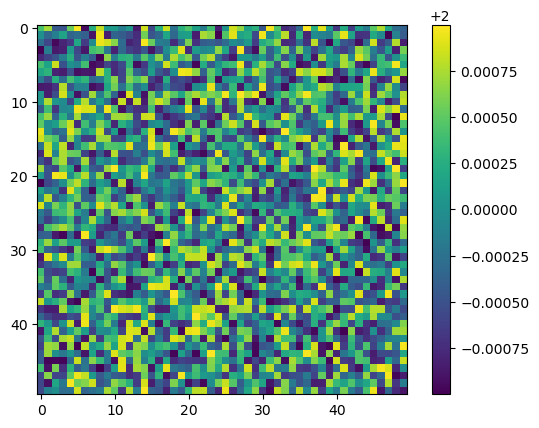

In [107]:
U0 = []
perturbation=0.001
# steadystates=[0.1,0.1]
steadystates = [2,3/2]
for index in range(n_species):
    U0.append(np.random.uniform(low=steadystates[index] - perturbation, high=steadystates[index] + perturbation, size=(I, J)))



#plot initial condition of species 1
plt.imshow(U0[0])
plt.colorbar()
plt.show()




Define alpha, A, B matrices

In [108]:
alpha = [Dn*dt/(2.*dx*dx) for Dn in D]


In [109]:
#A matrix (right-hand side of Ax=b)
def A(alpha_i):
    bottomdiag = [-alpha_i for j in range(J-1)]
    centraldiag = [1.+alpha_i]+[1.+2.*alpha_i for j in range(J-2)]+[1.+alpha_i]
    topdiag = [-alpha_i for j in range(J-1)]
    diagonals = [bottomdiag,centraldiag,topdiag]
    A = diags(diagonals, [ -1, 0,1]).toarray()
    return A
def diagonal_form(a, upper = 1, lower= 1):
    """
    a is a numpy square matrix
    this function converts a square matrix to diagonal ordered form
    returned matrix in ab shape which can be used directly for scipy.linalg.solve_banded
    """
    n = a.shape[1]
    assert(np.all(a.shape ==(n,n)))

    ab = np.zeros((2*n-1, n))

    for i in range(n):
        ab[i,(n-1)-i:] = np.diagonal(a,(n-1)-i)

    for i in range(n-1):
        ab[(2*n-2)-i,:i+1] = np.diagonal(a,i-(n-1))

    mid_row_inx = int(ab.shape[0]/2)
    upper_rows = [mid_row_inx - i for i in range(1, upper+1)]
    upper_rows.reverse()
    upper_rows.append(mid_row_inx)
    lower_rows = [mid_row_inx + i for i in range(1, lower+1)]
    keep_rows = upper_rows+lower_rows
    ab = ab[keep_rows,:]


    return ab
ab_list = [diagonal_form(A(alpha_i)) for alpha_i in alpha]
A_list = [A(alpha_i) for alpha_i in alpha]

In [110]:
    
def b(axis,ij,alpha_i,Un):
    b_t_stencil = np.array( [0] + [(1-alpha_i)] + [alpha_i])
    b_c_stencil = np.array( [alpha_i] + [(1-2*alpha_i)] + [alpha_i])
    b_b_stencil = np.array( [alpha_i] + [(1-alpha_i)] + [0])
    
    b = np.zeros(J)
    if axis == 'y':
        i = ij
        if i > 0 and i < I-1:
            for j in range(0,J):
                ux_three = [Un[j,i-1], Un[j,i], Un[j,i+1]]
                sub_b = np.sum(ux_three*b_c_stencil)
                b[j] = sub_b

        if i == 0:
            for j in range(0,J):
                ux_three = [0 , Un[j,i], Un[j,i+1]]
                sub_b = np.sum(ux_three*b_t_stencil)
                b[j] = sub_b

        if i == I-1:
            for j in range(0,J):
                ux_three = [Un[j,i-1], Un[j,i] , 0]
                sub_b = np.sum(ux_three*b_b_stencil)
                b[j] = sub_b


    if axis == 'x':  
        j = ij
        if j > 0 and  j < J-1:
            for i in range(0,I):
                uy_three = [Un[j-1,i], Un[j,i], Un[j+1,i]]
                sub_b = np.sum(uy_three*b_c_stencil)
                b[i] = sub_b

        if j == 0:
            for i in range(0,I):
                uy_three = [0, Un[j,i], Un[j+1,i]]
                sub_b = np.sum(uy_three*b_t_stencil)
                b[i] = sub_b

        if j == J-1:
            for i in range(0,I):
                uy_three = [Un[j-1,i], Un[j,i], 0]
                sub_b = np.sum(uy_three*b_b_stencil)
                b[i] = sub_b
    
    return b   

Solver function 1

In [111]:
#version one of ADI solver, a bit slower, but more intuitive]
def ADI1():
    U = copy.deepcopy(U0)
    for ti in tqdm(range(N)):
        
        U_half = copy.deepcopy(U)
        for i in range(I):
            for n in range(n_species):
                U_half[n][:,i] = numpy.linalg.solve(A(alpha[n]), b('y',i,alpha[n],U[n])) +  f(U)[n][:,i]*(dt/2)

        U_new = copy.deepcopy(U_half)
        for j in range(J):
            for n in range(n_species):
                U_new[n][j,:] = numpy.linalg.solve(A(alpha[n]), b('x',j,alpha[n],U_half[n])) + f(U_half)[n][j,:]*(dt/2)

        U = copy.deepcopy(U_new)
        
    return U


Solver function 2

In [112]:
#version two of ADI solver, faster but less intuitive. uses solve_banded package

def ADI2():
    U = copy.deepcopy(U0)
    
    ab_list = [diagonal_form(A(alpha_i)) for alpha_i in alpha]# = [A(alpha_i) for alpha_i in alpha] 
    
    for ti in tqdm(range(N)):
        
        U_half = copy.deepcopy(U)
        for i in range(I):
            for n in range(n_species):
                U_half[n][:,i] = solve_banded((1, 1), ab_list[n], b('y',i,alpha[n],U[n])) +  f(U)[n][:,i]*(dt/2)

        U_new = copy.deepcopy(U_half)
        for j in range(J):
            for n in range(n_species):
                U_new[n][j,:] = solve_banded((1, 1), ab_list[n], b('x',j,alpha[n],U_half[n])) + f(U_half)[n][j,:]*(dt/2)

        U = copy.deepcopy(U_new)
        
    return U

Execute code

100%|██████████| 2500/2500 [02:19<00:00, 17.88it/s]


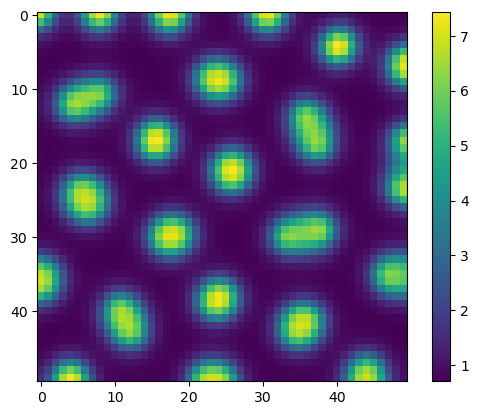

In [113]:
U = ADI2()   
plt.imshow(U[0])  
plt.colorbar()
plt.show()
